In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [14]:
!pip install folium

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.



  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


In [12]:
!pip install pycountry

In [15]:
import folium
import plotly.express as px
import matplotlib.ticker as mtick
import pycountry

In [8]:
df=pd.read_csv('forest_area_km.csv')

In [9]:
df.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,12084.4,12084.40,12084.40,12084.40,12084.40,12084.4,12084.40,12084.40,...,12084.40,12084.400,12084.40,12084.400,12084.4,12084.400,12084.4,12084.4,12084.4,12084.400
1,Albania,ALB,7888.0,7868.50,7849.00,7829.50,7810.00,7790.5,7771.00,7751.50,...,7849.17,7863.405,7877.64,7891.875,7891.8,7889.025,7889.0,7889.0,7889.0,7889.000
2,Algeria,DZA,16670.0,16582.00,16494.00,16406.00,16318.00,16230.0,16142.00,16054.00,...,19332.00,19408.000,19484.00,19560.000,19560.0,19430.000,19300.0,19390.0,19490.0,19583.333
3,American Samoa,ASM,180.7,180.36,180.02,179.68,179.34,179.0,178.66,178.32,...,173.70,173.400,173.10,172.800,172.5,172.200,171.9,171.6,171.3,171.000
4,Andorra,AND,160.0,160.00,160.00,160.00,160.00,160.0,160.00,160.00,...,160.00,160.000,160.00,160.000,160.0,160.000,160.0,160.0,160.0,160.000


In [17]:
forest_df=pd.read_csv('forest_area_percent.csv')

In [11]:
df2.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782
1,Albania,ALB,28.788321,28.717153,28.645985,28.574818,28.503650,28.432482,28.361314,28.290146,...,28.646606,28.698558,28.750511,28.802464,28.802190,28.792062,28.791971,28.791971,28.791971,28.791971
2,Algeria,DZA,0.699908,0.696214,0.692519,0.688824,0.685129,0.681435,0.677740,0.674045,...,0.811675,0.814866,0.818057,0.821248,0.821248,0.815790,0.810332,0.814110,0.818309,0.822228
3,American Samoa,ASM,90.350000,90.180000,90.010000,89.840000,89.670000,89.500000,89.330000,89.160000,...,86.850000,86.700000,86.550000,86.400000,86.250000,86.100000,85.950000,85.800000,85.650000,85.500000
4,Andorra,AND,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,...,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553


In [16]:
plt.style.use('ggplot')
percent_formatter = mtick.StrMethodFormatter('{x:,.0f}%')
percent_d_formatter = mtick.StrMethodFormatter('{x:,.00f}%')

In [18]:
countries = []
for country in pycountry.countries:
    countries.append(country.name)
country_df = forest_df[forest_df["Country Name"].isin(countries)]

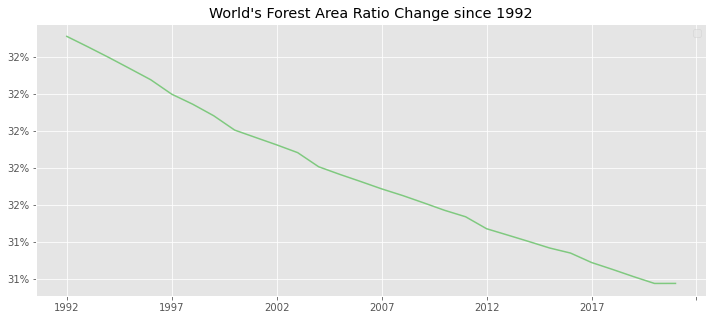

In [19]:
fig, ax = plt.subplots(figsize=(12,5))
world_df = forest_df[forest_df["Country Name"] == "World"].drop(columns="Country Code").set_index("Country Name").transpose().dropna()
world_df.dropna().plot(colormap="Accent", ax=ax)
ax.yaxis.set_major_formatter(percent_d_formatter)
plt.title("World's Forest Area Ratio Change since 1992")
plt.legend("")
plt.show()

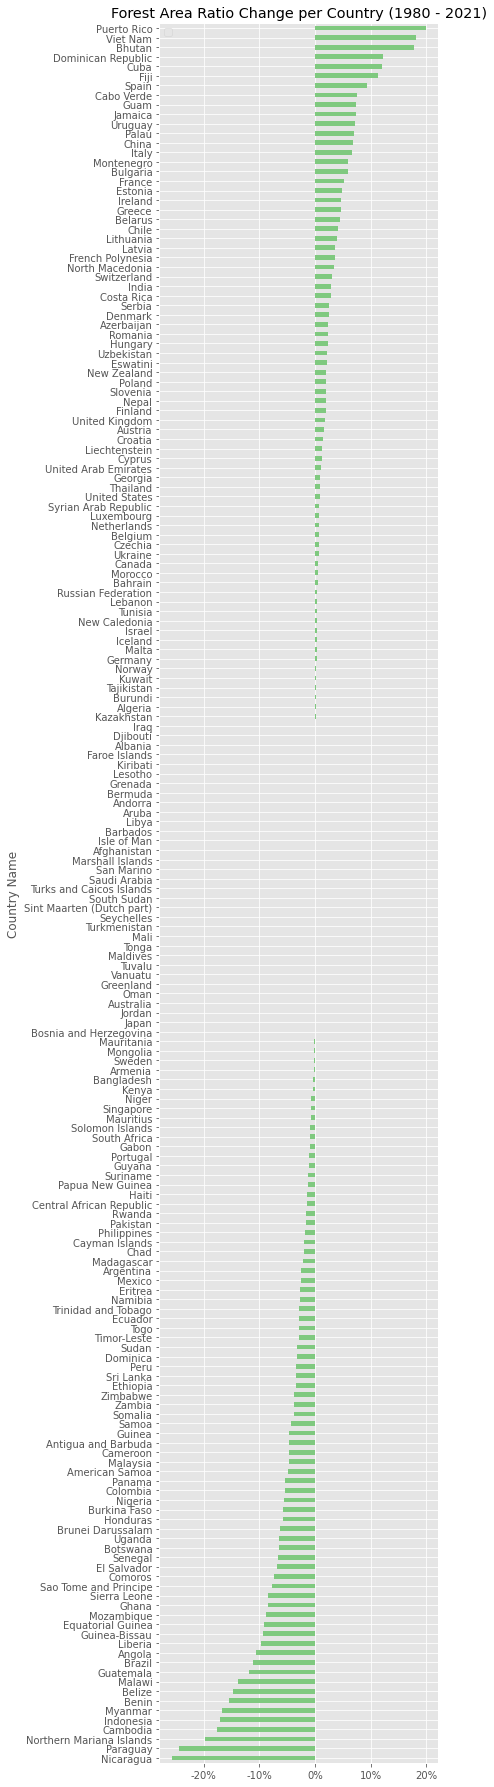

In [20]:
c_diff_df = country_df.drop(columns="Country Code").set_index("Country Name").transpose().diff().sum().reset_index(name="change")
ax = c_diff_df.sort_values("change").plot.barh(x="Country Name", y="change", figsize=(5, 32), colormap="Accent")
plt.title("Forest Area Ratio Change per Country (1980 - 2021)")
plt.legend("")
ax.xaxis.set_major_formatter(percent_formatter)
plt.show()